## Домашнее задание
Будем работать с датасетом о рыбах https://www.kaggle.com/crowww/a-large-scale-fish-dataset

Домашнее задание аналогично предыдущему. Необходимо применить сверточные нейронные сети, сравнить результаты с полносвязными сетями

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.metrics import categorical_crossentropy, categorical_accuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [38]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_train_all',
        target_size=(148, 197),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_val_all',
        target_size=(148, 197),
        batch_size=32,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_test_all',
        target_size=(148, 197),
        batch_size=1,
        class_mode='categorical')

Found 6300 images belonging to 9 classes.
Found 900 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.


In [40]:
sample_training_images, _ = next(train_generator)

In [41]:
print (train_generator.class_indices)

{'Black Sea Sprat': 0, 'Gilt-Head Bream': 1, 'Hourse Mackerel': 2, 'Red Mullet': 3, 'Red Sea Bream': 4, 'Sea Bass': 5, 'Shrimp': 6, 'Striped Red Mullet': 7, 'Trout': 8}


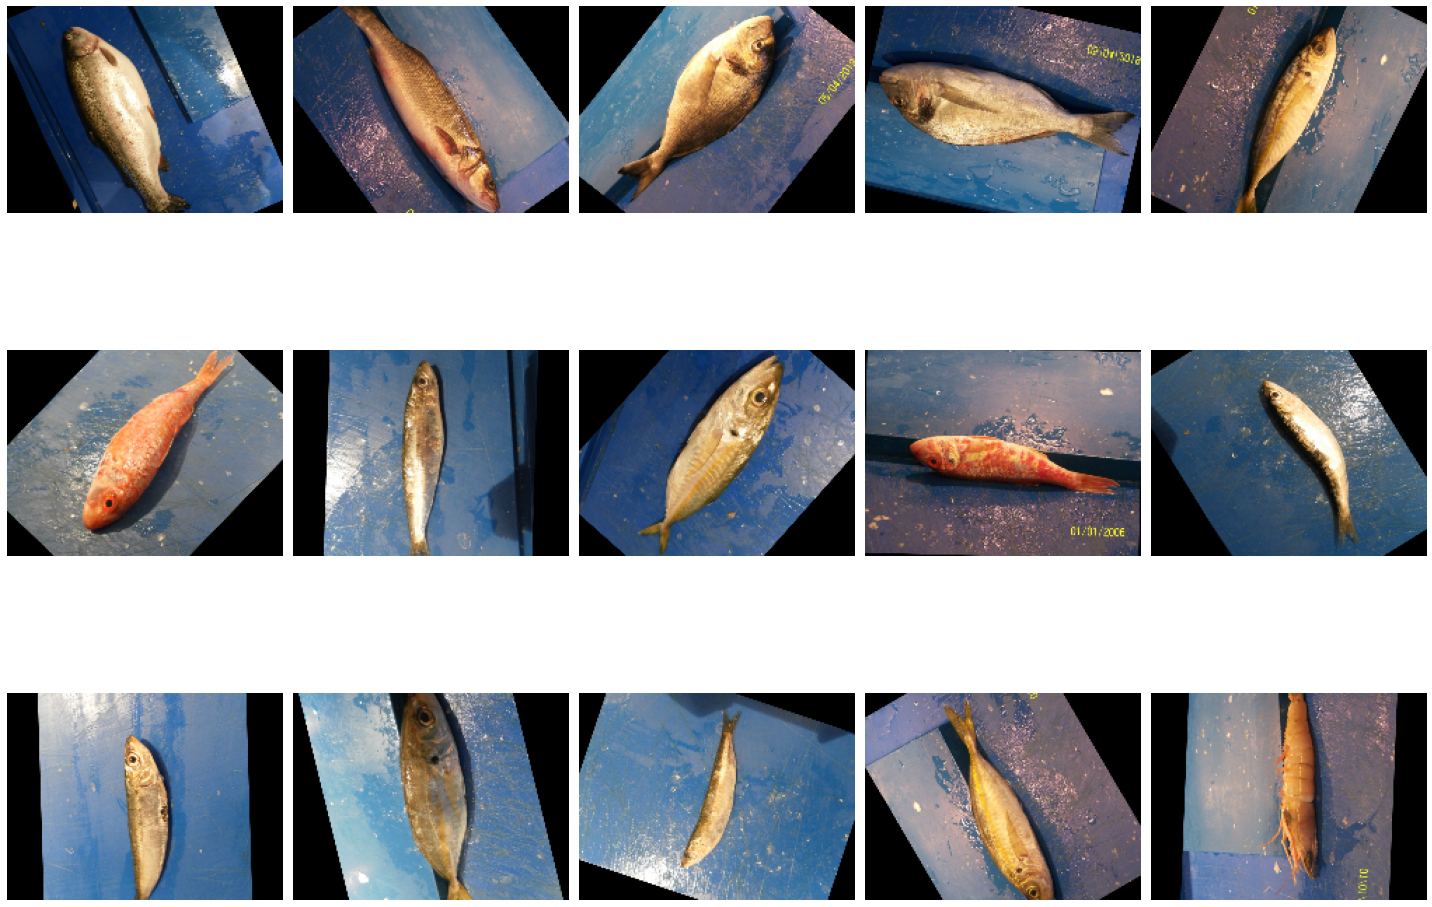

In [42]:
def plotImages(images_arr):
    fig, axes = plt.subplots(3, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
plt.show()

plotImages(sample_training_images[:15])

In [43]:
model_С = Sequential(
    [
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(148, 197, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(9, activation="softmax"),
    ]
)

batch_size = 32
epochs = 25

model_С.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
model_С.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 146, 195, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 97, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 95, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 33, 45, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 22, 64)      

In [45]:
es = EarlyStopping(monitor='loss', min_delta=0.001, patience=5, verbose=1)

In [46]:
history = model_С.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=batch_size,
                    epochs=epochs, 
                    callbacks=[es])

Epoch 1/25
197/197 [==============================] - 91s 457ms/step - loss: 1.3624 - accuracy: 0.4965 - val_loss: 0.8537 - val_accuracy: 0.6778
Epoch 2/25
197/197 [==============================] - 93s 471ms/step - loss: 0.5034 - accuracy: 0.8246 - val_loss: 0.4050 - val_accuracy: 0.8522
Epoch 3/25
197/197 [==============================] - 93s 470ms/step - loss: 0.2668 - accuracy: 0.9071 - val_loss: 0.2843 - val_accuracy: 0.8978
Epoch 4/25
197/197 [==============================] - 93s 469ms/step - loss: 0.1379 - accuracy: 0.9508 - val_loss: 0.1292 - val_accuracy: 0.9578
Epoch 5/25
197/197 [==============================] - 92s 469ms/step - loss: 0.0760 - accuracy: 0.9735 - val_loss: 0.1786 - val_accuracy: 0.9256
Epoch 6/25
197/197 [==============================] - 93s 472ms/step - loss: 0.0530 - accuracy: 0.9806 - val_loss: 0.1137 - val_accuracy: 0.9644
Epoch 7/25
197/197 [==============================] - 93s 471ms/step - loss: 0.0609 - accuracy: 0.9802 - val_loss: 0.2509 - val_ac

In [47]:
model_С.evaluate(test_generator)

1800/1800 [==============================] - 14s 8ms/step - loss: 0.0671 - accuracy: 0.9789


[0.06711383908987045, 0.9788888692855835]

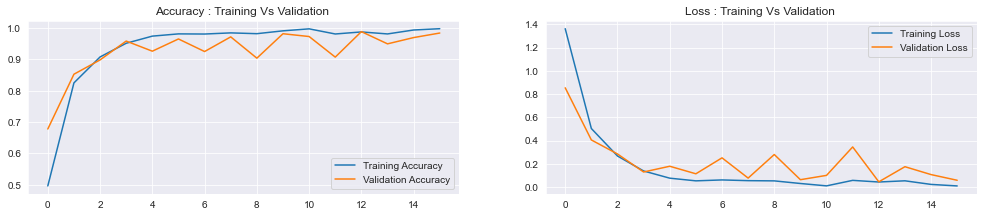

In [49]:
accuracy = history.history['accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(16), accuracy, label='Training Accuracy')
plt.plot(range(16), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training Vs Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(16), loss, label='Training Loss')
plt.plot(range(16), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

In [51]:
model_S = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(148, 197, 3)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9,activation="softmax")
])

model_S.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
history_S = model_S.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=batch_size,
                    epochs=epochs, 
                    callbacks=[es])

Epoch 1/25
197/197 [==============================] - 43s 216ms/step - loss: 4.7936 - accuracy: 0.4371 - val_loss: 2.3937 - val_accuracy: 0.5133
Epoch 2/25
197/197 [==============================] - 42s 215ms/step - loss: 1.3656 - accuracy: 0.6278 - val_loss: 1.3645 - val_accuracy: 0.6089
Epoch 3/25
197/197 [==============================] - 43s 220ms/step - loss: 0.9072 - accuracy: 0.7190 - val_loss: 0.8662 - val_accuracy: 0.7322
Epoch 4/25
197/197 [==============================] - 42s 215ms/step - loss: 0.5935 - accuracy: 0.7997 - val_loss: 0.6574 - val_accuracy: 0.7822
Epoch 5/25
197/197 [==============================] - 42s 215ms/step - loss: 0.4298 - accuracy: 0.8511 - val_loss: 1.1606 - val_accuracy: 0.6711
Epoch 6/25
197/197 [==============================] - 42s 214ms/step - loss: 0.4288 - accuracy: 0.8552 - val_loss: 0.7221 - val_accuracy: 0.7767
Epoch 7/25
197/197 [==============================] - 42s 214ms/step - loss: 0.4244 - accuracy: 0.8592 - val_loss: 0.6279 - val_ac

In [53]:
model_S.evaluate(test_generator)

1800/1800 [==============================] - 13s 7ms/step - loss: 0.4469 - accuracy: 0.8728


[0.44689643383026123, 0.8727777600288391]

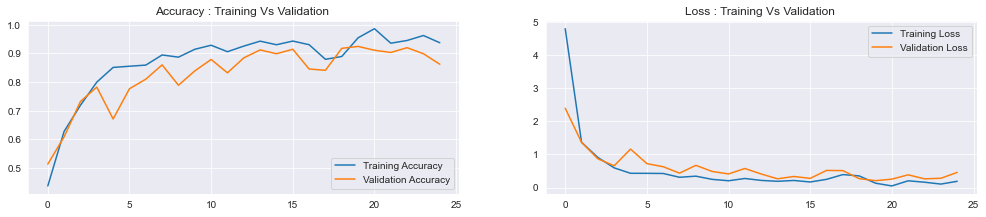

In [54]:
accuracy_S = history_S.history['accuracy']
loss_S = history_S.history['loss']
validation_loss_S = history_S.history['val_loss']
validation_accuracy_S = history_S.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(25), accuracy_S, label='Training Accuracy')
plt.plot(range(25), validation_accuracy_S, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training Vs Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(25), loss_S, label='Training Loss')
plt.plot(range(25), validation_loss_S, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

In [57]:
model_Сd = Sequential(
    [
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(148, 197, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),
        layers.Flatten(),
        layers.Dense(9, activation="softmax"),
    ]
)

batch_size = 32
epochs = 25

model_Сd.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
history_Сd = model_Сd.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size=batch_size,
                    epochs=epochs, 
                    callbacks=[es])

Epoch 1/25
197/197 [==============================] - 109s 544ms/step - loss: 1.6255 - accuracy: 0.3892 - val_loss: 1.0352 - val_accuracy: 0.6333
Epoch 2/25
197/197 [==============================] - 109s 551ms/step - loss: 0.6963 - accuracy: 0.7525 - val_loss: 0.5213 - val_accuracy: 0.8167
Epoch 3/25
197/197 [==============================] - 108s 550ms/step - loss: 0.4146 - accuracy: 0.8521 - val_loss: 0.2990 - val_accuracy: 0.8989
Epoch 4/25
197/197 [==============================] - 111s 563ms/step - loss: 0.2527 - accuracy: 0.9094 - val_loss: 0.2115 - val_accuracy: 0.9244
Epoch 5/25
197/197 [==============================] - 118s 596ms/step - loss: 0.1505 - accuracy: 0.9476 - val_loss: 0.1484 - val_accuracy: 0.9444
Epoch 6/25
197/197 [==============================] - 114s 579ms/step - loss: 0.1062 - accuracy: 0.9625 - val_loss: 0.1847 - val_accuracy: 0.9400
Epoch 7/25
197/197 [==============================] - 109s 553ms/step - loss: 0.0930 - accuracy: 0.9671 - val_loss: 0.1480 -

In [59]:
model_Сd.evaluate(test_generator)

1800/1800 [==============================] - 14s 8ms/step - loss: 0.0812 - accuracy: 0.9772


[0.08118409663438797, 0.977222204208374]

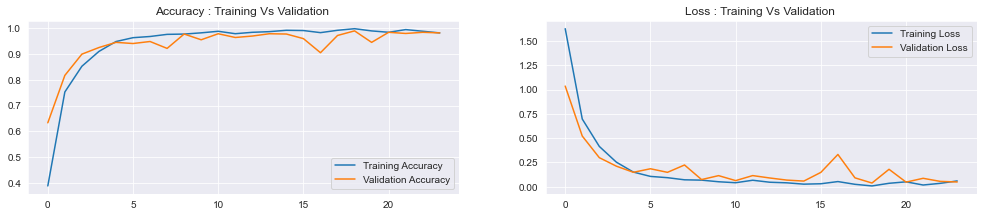

In [61]:
accuracy_Cd = history_Сd.history['accuracy']
loss_Cd = history_Сd.history['loss']
validation_loss_Cd = history_Сd.history['val_loss']
validation_accuracy_Cd = history_Сd.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(24), accuracy_Cd, label='Training Accuracy')
plt.plot(range(24), validation_accuracy_Cd, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training Vs Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(24), loss_Cd, label='Training Loss')
plt.plot(range(24), validation_loss_Cd, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

### Результат

Модель сверточной нейронной сети дала 97.7-97.9% accuracy на тестовой выборке, в то время как полносвязная сеть дает 87,3% accuracy на этой же выборке. 

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_train_all',
        target_size=(148, 197),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_val_all',
        target_size=(148, 197),
        batch_size=32,
        shuffle=False,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_test_all',
        target_size=(148, 197),
        batch_size=1,
        shuffle=False,
        class_mode='categorical')

Found 6300 images belonging to 9 classes.
Found 900 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.


In [8]:
model_Сdm = Sequential(
    [
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(148, 197, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(9, activation="softmax"),
    ]
)

batch_size = 32
epochs = 15

model_Сdm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
model_Сdm.fit_generator(train_generator,
                    steps_per_epoch=6300 // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=900 // batch_size)

#Confution Matrix and Classification Report
validation_generator.reset()
Y_pred = model_Сdm.predict_generator(validation_generator, 900 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


C:\Users\Анна\AppData\Local\Temp\ipykernel_4168\1420037376.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_Сdm.fit_generator(train_generator,


Epoch 1/15
196/196 [==============================] - 247s 1s/step - loss: 1.7589 - accuracy: 0.3339 - val_loss: 1.3736 - val_accuracy: 0.5234
Epoch 2/15
196/196 [==============================] - 106s 541ms/step - loss: 0.8771 - accuracy: 0.6916 - val_loss: 0.6463 - val_accuracy: 0.7679
Epoch 3/15
196/196 [==============================] - 107s 545ms/step - loss: 0.5460 - accuracy: 0.8103 - val_loss: 0.4372 - val_accuracy: 0.8449
Epoch 4/15
196/196 [==============================] - 107s 548ms/step - loss: 0.3204 - accuracy: 0.8898 - val_loss: 0.3068 - val_accuracy: 0.8839
Epoch 5/15
196/196 [==============================] - 108s 548ms/step - loss: 0.2459 - accuracy: 0.9156 - val_loss: 0.2225 - val_accuracy: 0.9219
Epoch 6/15
196/196 [==============================] - 108s 548ms/step - loss: 0.1767 - accuracy: 0.9381 - val_loss: 0.1554 - val_accuracy: 0.9487
Epoch 7/15
196/196 [==============================] - 108s 550ms/step - loss: 0.1390 - accuracy: 0.9512 - val_loss: 0.1283 - va

C:\Users\Анна\AppData\Local\Temp\ipykernel_4168\1420037376.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_Сdm.predict_generator(validation_generator, 900 // batch_size+1)


Confusion Matrix
[[ 98   0   0   0   0   1   0   1   0]
 [  0  95   0   0   2   0   0   3   0]
 [  0   0  96   0   2   0   0   1   1]
 [  0   0   0  98   0   0   2   0   0]
 [  0   0   0   0 100   0   0   0   0]
 [  2   0   3   0   2  90   0   3   0]
 [  0   0   0   1   0   0  97   2   0]
 [  0   0   0   0   0   0   0 100   0]
 [  0   0   0   0   1   0   0   0  99]]
Classification Report
                    precision    recall  f1-score   support

   Black Sea Sprat       0.98      0.98      0.98       100
   Gilt-Head Bream       1.00      0.95      0.97       100
   Hourse Mackerel       0.97      0.96      0.96       100
        Red Mullet       0.99      0.98      0.98       100
     Red Sea Bream       0.93      1.00      0.97       100
          Sea Bass       0.99      0.90      0.94       100
            Shrimp       0.98      0.97      0.97       100
Striped Red Mullet       0.91      1.00      0.95       100
             Trout       0.99      0.99      0.99       100

       

In [13]:
model_Сdm.evaluate(test_generator)

1800/1800 [==============================] - 31s 17ms/step - loss: 0.0813 - accuracy: 0.9733


[0.08131140470504761, 0.9733333587646484]